## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

# import 需要的套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 導入資料集、線性模型
from sklearn import datasets, linear_model
from sklearn.datasets import load_boston, load_wine

# 分割數據模塊，把數據集分為訓練集和測試集
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## Dataset source reference

url: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

## Linear regssion

在機器學習中，我們通常將原始數據按照比例分割為"測試集"和"訓練集"，通常使用sklearn.cross_validation裡的train_test_split模塊用來分割數據。

## 語法架構
X_train,X_test, y_train, y_test =sklearn.model_selection.train_test_split(train_data,train_target,test_size=0.4, random_state=0, stratify= y_train )

### 參數說明
- train_data：所要劃分的樣本特徵集。

- train_target：所要劃分的樣本結果。

- test_size：樣本佔比，如果是整數的話就是樣本的數量。

- random_state：是隨機數的種子。(隨機數種子：其實就是該組隨機數的編號，在需要重複試驗的時候，保證得到一組一樣的隨機數。比如你每次都填1，其他參數一樣的情況下你得到的隨機數組是一樣的。但填0或不填，每次都會不一樣。)


In [2]:
# 讀取波士頓房價資料集
boston = datasets.load_boston()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
# 劃分資料集
# np.newaxis的功能是插入新維度
X = boston.data[:, np.newaxis, 5]
print("Data shape: ", X.shape) # 可以看見有 506 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (506, 1)


In [3]:
# 可以看回歸模型的參數值，輸出迴歸係數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [8.95430408]
Mean squared error: 32.40


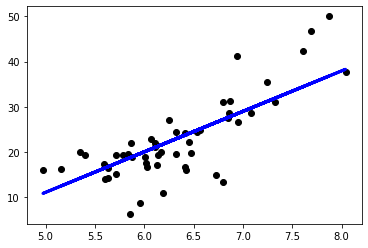

In [4]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

# Logistics regression

In [5]:
# 讀取鳶尾花資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
# accuracy_score為分類的準確率
# 分類準確率分數是指所有分類正確的百分比
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8888888888888888


In [7]:
# 讀取 wine 資料
wine = load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

# 建立一個羅吉斯回歸模型
logreg = linear_model.LogisticRegression()

# 將訓練資料丟進去模型訓練
logreg.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8888888888888888


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
